<a href="https://colab.research.google.com/github/Vjaiswal07/CarSafety/blob/main/class_112_113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a graph to display life expectancy rate in Canada


In [ ]:
import plotly.express as px 
df=px.data.gapminder().query("country=='Canada'")
fig=px.line(df,x="year",y="lifeExp",title="life expectancy in canada")
fig.show()

In [ ]:
import pandas as pd
import statistics
import plotly.express as px
from google.colab import files
data_to_load=files.upload()


Saving savings_data_final.csv to savings_data_final.csv


In [ ]:
df=pd.read_csv("savings_data_final.csv")
fig=px.scatter(df,y="quant_saved",color="rem_any")
fig.show()

In [ ]:
import csv 
with open("savings_data_final.csv",newline="") as f:
  reader=csv.reader(f)
  savings_data=list(reader)
savings_data.pop(0)
total_entries=len(savings_data)
total_people_given_reminder=0
for data in savings_data:
  if int(data[3])==1:
    total_people_given_reminder+=1
import plotly.graph_objects as go 
fig=go.Figure(go.Bar(x=["reminded","not reminded"],y=[total_people_given_reminder,total_entries-total_people_given_reminder]))
fig.show()

In [ ]:
all_savings=[]
for data in savings_data:
  all_savings.append(float(data[0]))
print(f"mean of savings is {statistics.mean(all_savings)}")
print(f"median of savings is {statistics.median(all_savings)}")
print(f"mode of savings is {statistics.mode(all_savings)}")

mean of savings is 85.32780331328739
median of savings is 39.2724
mode of savings is 0.0


In [ ]:
reminded_savings=[]
not_reminded_savings=[]
for data in savings_data:
  if int(data[3])==1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))
print("results for people who are reminded to save")
print(f"mean of savings is {statistics.mean(reminded_savings)}")
print(f"median of savings is {statistics.median(reminded_savings)}")
print(f"mode of savings is {statistics.mode(reminded_savings)}")
print("\n\n")
print("results for people who are not reminded to save")
print(f"mean of savings is {statistics.mean(not_reminded_savings)}")
print(f"median of savings is {statistics.median(not_reminded_savings)}")
print(f"mode of savings is {statistics.mode(not_reminded_savings)}")

results for people who are reminded to save
mean of savings is 82.56940908263547
median of savings is 39.2724
mode of savings is 0.0



results for people who are not reminded to save
mean of savings is 89.67095185226523
median of savings is 36.0475
mode of savings is 0.0


In [ ]:
print(f"standard deviation of all data is {statistics.stdev(all_savings)}")
print(f"standard deviation of people who were reminded is {statistics.stdev(reminded_savings)}")
print(f"standard deviation of people who were not reminded is {statistics.stdev(not_reminded_savings)}")

standard deviation of all data is 196.75453011909315
standard deviation of people who were reminded is 173.24866414440817
standard deviation of people who were not reminded is 228.875050299707


In [ ]:
import numpy as np
age=[]
savings=[]
for data in savings_data:
  if float(data[5])!=0:
    age.append(float(data[5]))
    savings.append(float(data[0]))
correlation=np.corrcoef(age,savings)
print(f"correlation between age and the savings is {correlation[0,1]}")

correlation between age and the savings is 0.03663447975985462


In [ ]:
import plotly.figure_factory as ff
fig=ff.create_distplot([df["quant_saved"].tolist()],["savings"],show_hist=False)
fig.show()

Class 113

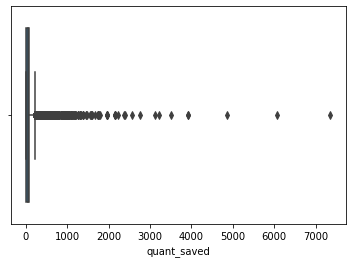

In [ ]:
import seaborn as sns 
sns.boxplot(data=df,x=df["quant_saved"])

In [ ]:
q1=df["quant_saved"].quantile(0.25)
q3=df["quant_saved"].quantile(0.75)
iqr=q3-q1
print(f"Q1-{q1}")
print(f"Q3-{q3}")
print(f"IQR-{iqr}")
lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
print(f"lowerwhisker-{lower_whisker}")
print(f"upperwhisker-{upper_whisker}")
new_df=df[df["quant_saved"]<upper_whisker]

Q1-2.2840000000000003
Q3-86.514
IQR-84.22999999999999
lowerwhisker--124.06099999999998
upperwhisker-212.85899999999998


In [ ]:
all_savings=new_df["quant_saved"].tolist()

print(f"mean of savings is {statistics.mean(all_savings)}")
print(f"median of savings is {statistics.median(all_savings)}")
print(f"mode of savings is {statistics.mode(all_savings)}")
print(f"standard deviation of savings is {statistics.stdev(all_savings)}")
import plotly.figure_factory as ff
fig=ff.create_distplot([new_df["quant_saved"].tolist()],["savings"],show_hist=False)
fig.show()

mean of savings is 46.200519389818794
median of savings is 36.0475
mode of savings is 0.0
standard deviation of savings is 50.866871917288634


In [ ]:
import random
sampling_mean_list=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))
mean_sampling=statistics.mean(sampling_mean_list)
fig=ff.create_distplot([sampling_mean_list],["savings(sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="mean"))
fig.show()

In [ ]:
print(f"mean of sampling is {mean_sampling}")
print(f"standard deviation of sampling is {statistics.stdev(sampling_mean_list)}")

mean of sampling is 46.40718011860609
standard deviation of sampling is 4.964866813244532


In [ ]:
temp_df=new_df[new_df.age!=0]
age=temp_df["age"].tolist()
savings=temp_df["quant_saved"].tolist()
correlation=np.corrcoef(age,savings)
print(f"correlation between age and the savings is {correlation[0,1]}")


correlation between age and the savings is 0.08561544120342093


In [ ]:
reminded_df=new_df.loc[new_df["rem_any"]==1]
not_reminded_df=new_df.loc[new_df["rem_any"]==0]
print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [ ]:
fig=ff.create_distplot([not_reminded_df["quant_saved"].tolist()],["savings(not reminded)"],show_hist=False)
fig.show()

In [ ]:
not_reminded_savings=not_reminded_df["quant_saved"].tolist()
sampling_mean_list_not_reminded=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))
mean_sampling_not_reminded=statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded=statistics.stdev(sampling_mean_list_not_reminded)
print(f"mean of sampling(not reminded)is{mean_sampling_not_reminded}")
print(f"standard deviation of sampling(not reminded)is{stdev_sampling_not_reminded}")

fig=ff.create_distplot([sampling_mean_list_not_reminded],["savings(sampling not reminded)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="mean"))
fig.show()

mean of sampling(not reminded)is43.77999215652537
standard deviation of sampling(not reminded)is5.079552206394032


In [ ]:
reminded_savings=reminded_df["quant_saved"].tolist()
sampling_mean_list_reminded=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))
mean_sampling_reminded=statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded=statistics.stdev(sampling_mean_list_reminded)
print(f"mean of sampling(reminded)is{mean_sampling_reminded}")
print(f"standard deviation of sampling(reminded)is{stdev_sampling_reminded}")

fig=ff.create_distplot([sampling_mean_list_reminded],["savings(sampling reminded)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="mean"))
fig.show()

mean of sampling(reminded)is47.49000493139104
standard deviation of sampling(reminded)is4.836030698687361


In [ ]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded 
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded 
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}") 
second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded) 
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}") 
third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded) 
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded) 
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")


First (start) - 38.70043995013133 and First (end) - 48.8595443629194
Second (start) - 33.6208877437373 and Second (end) - 53.939096569313435
Third (start) - 28.541335537343272 and Third (end) - 59.01864877570746


In [ ]:
z_score=(mean_sampling_reminded-mean_sampling_not_reminded)/stdev_sampling_not_reminded
print(f"z score is {z_score}")

z score is 0.7303818573211216
